In [2]:
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
from keras.models import load_model

lemmatizer = WordNetLemmatizer()

words = []
classes = []
documents = []
ignore_word = ['?','!']
data_file = open("models\intents_final2.json").read()
intents = json.loads(data_file)

In [3]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))

        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [4]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_word]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

print(len(documents), "documents")
print(len(classes), "classes", classes)
print(len(words), "unique lematized words", words)

pickle.dump(words,open('text_final3.pkl','wb'))
pickle.dump(classes,open('labels_final3.pkl','wb'))

147 documents
26 classes ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'curhat1', 'curhat10', 'curhat11', 'curhat12', 'curhat13', 'curhat14', 'curhat15', 'curhat2', 'curhat3', 'curhat4', 'curhat5', 'curhat6', 'curhat7', 'curhat8', 'goodbye', 'salam', 'terimakasih']
361 unique lematized words [',', '...', '1', '1,7', '1.apa', '2', '2.apa', '3', '3.gejala', '4', '4.bagaimana', '5', '5.kalo', '6', '6.bahaya', '7', '7.apakah', '8', '8.curhat', '9', '9.jika', 'abis', 'ada', 'agar', 'air', 'aja', 'akan', 'akhir', 'akhir-akhir', 'aktivitas', 'aku', 'alami', 'aman', 'anak', 'anda', 'anjlok', 'apa', 'apakah', 'apapun', 'asa', 'atau', 'awalnya', 'badan', 'bagaimana', 'bahaya', 'bahkan', 'baik', 'banget', 'barang', 'baru', 'bawa', 'bawaanya', 'beberapa', 'bebrapa', 'begadang', 'benci', 'berada', 'beranggapan', 'berbeda', 'berguna', 'berkepanjangan', 'berlebihan', 'berpisah', 'bertanya', 'bertemu', 'berteriak', 'biaya', 'bilang', 'bisa', 'broken', 'bulan', 'bunuh', 'bye', 'cara', 'cemas', 'cenderu

In [5]:
training = []

output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    pattern_word = doc[0]

    pattern_word = [lemmatizer.lemmatize(word.lower()) for word in pattern_word]

    for w in words:
        bag.append(1) if w in pattern_word else bag.append(0)
    
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training)

train_x = list(training[:,0])
train_y = list(training[:,1])

print('Training data complete!')

Training data complete!


In [6]:
model = Sequential()
model.add(Dense(147, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(train_y[0]), activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist = model.fit(np.array(train_x), np.array(train_y), epochs=100, batch_size=5, verbose=1)


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 3.2474 - accuracy: 0.0612
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 3.1750 - accuracy: 0.1156
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 3.0955 - accuracy: 0.1224
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 3.0072 - accuracy: 0.1905
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 2.8959 - accuracy: 0.1837
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 2.7126 - accuracy: 0.2517
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 2.4848 - accuracy: 0.3061
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 2.2307 - accuracy: 0.3605
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 1.8518 - accuracy: 0.5034
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 1.5093 - accuracy: 0.5782
Epoch 11/

In [7]:
model.save('chatbot_model_final3.h5', hist)
print("\n")
print("*" * 50)
print("\n Model Created Complete!")



**************************************************

 Model Created Complete!


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 147)               53214     
                                                                 
 dense_1 (Dense)             (None, 32)                4736      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 26)                1690      
                                                                 
Total params: 61,752
Trainable params: 61,752
Non-trainable params: 0
_________________________________________________________________


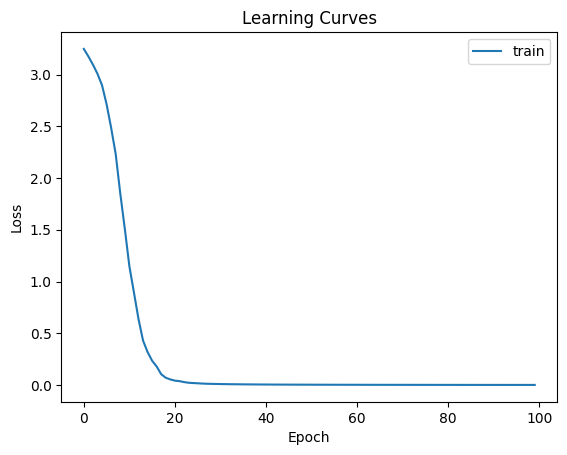

In [9]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.legend()
pyplot.show()

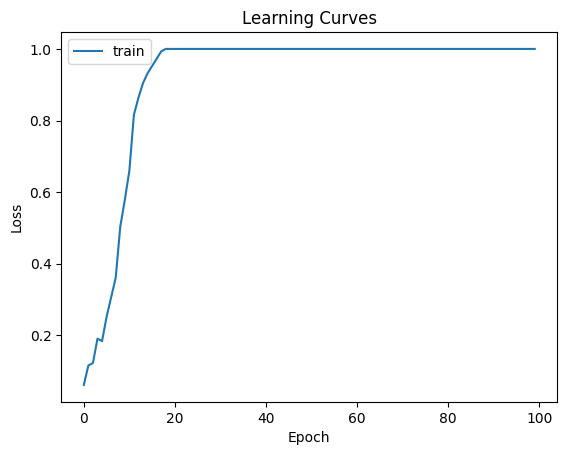

In [10]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()